In [4]:
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [5]:
mnist = pd.read_csv("../datasets/mnist_train_small.csv", header=None).values

X, y = mnist[:, 1:].reshape(-1, 28, 28, 1), mnist[:, :1]

ohe = OneHotEncoder(categories="auto")

y_hot = ohe.fit_transform(y).todense()

In [7]:
in_encod = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation="relu", padding="same")(in_encod)
x = MaxPooling2D(padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D(padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
out_encod = MaxPooling2D(padding="same")(x)

In [8]:
encoder = Model(in_encod, out_encod)

In [11]:
# encoder.summary()


In [17]:
in_decod = Input(shape=(4, 4, 64))
x = UpSampling2D()(in_decod)
x = Conv2D(32, (3, 3), padding="same", activation="relu")(x)
x = UpSampling2D()(x)
x = Conv2D(16, (3, 3), activation="relu")(x)
x = UpSampling2D()(x)
out_decod  = Conv2D(1, (3, 3), padding="same", activation="sigmoid")(x)

In [18]:
decoder = Model(in_decod, out_decod)

In [20]:
# decoder.summary()

In [21]:
in_auto = Input(shape=(28, 28, 1))
enc_layer = encoder(in_auto)
dec_layer = decoder(enc_layer)

In [22]:
autoencoder = Model(in_auto, dec_layer)

In [23]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Model)                (None, 4, 4, 64)          23296     
_________________________________________________________________
model_1 (Model)              (None, 28, 28, 1)         23233     
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


In [24]:
X_mod = X / 255

In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_mod, y, test_size=0.33, random_state=42)

In [27]:
hist = autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 13400 samples, validate on 6600 samples
Epoch 1/10
13400/13400 [==============================] - 13s 961us/sample - loss: 0.3669 - val_loss: 0.1935
Epoch 2/10
13400/13400 [==============================] - 12s 906us/sample - loss: 0.1695 - val_loss: 0.1529
Epoch 3/10
13400/13400 [==============================] - 12s 899us/sample - loss: 0.1445 - val_loss: 0.1360
Epoch 4/10
13400/13400 [==============================] - 13s 935us/sample - loss: 0.1298 - val_loss: 0.1233
Epoch 5/10
13400/13400 [==============================] - 14s 1ms/sample - loss: 0.1207 - val_loss: 0.1186
Epoch 6/10
13400/13400 [==============================] - 12s 899us/sample - loss: 0.1154 - val_loss: 0.1125
Epoch 7/10
13400/13400 [==============================] - 12s 904us/sample - loss: 0.1116 - val_loss: 0.1096
Epoch 8/10
13400/13400 [==============================] - 12s 906us/sample - loss: 0.1084 - val_loss: 0.1062
Epoch 9/10
13400/13400 [==============================] - 12s 898us/sample - loss

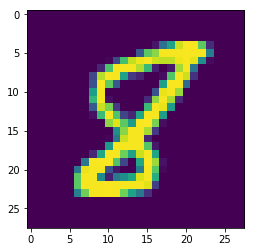

In [28]:
plt.imshow(X_train[3].reshape(28, 28))

In [29]:
out = autoencoder.predict(np.array([X_train[3]]))

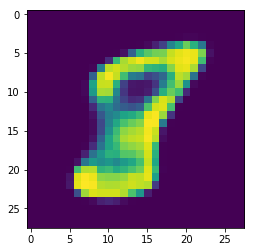

In [30]:
plt.imshow(out[0].reshape(28, 28))